In [3]:
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
#import pandas as pd
#data = pd.io.stata.read_stata('/content/DAWN-2011-DS0001-data-stata.dta')
#data.to_csv('my_stata_file.csv')

In [34]:
#df = pd.read_csv('/content/my_stata_file.csv')

In [35]:
#df.head()

,Unnamed: 0,CASEID,METRO,STRATA,PSU,REPLICATE,CASEWGT,PSUFRAME,AGECAT,SEX,RACE,YEAR,QUARTER,DAYPART,NUMSUBS,DRUGID_1,CATID_1_1,CATID_2_1,CATID_3_1,ROUTE_1,TOXTEST_1,SDLED_1_1,SDLED_2_1,SDLED_3_1,SDLED_4_1,SDLED_5_1,SDLED_6_1,DRUGID_2,CATID_1_2,CATID_2_2,CATID_3_2,ROUTE_2,TOXTEST_2,SDLED_1_2,SDLED_2_2,SDLED_3_2,SDLED_4_2,SDLED_5_2,SDLED_6_2,DRUGID_3,CATID_1_3,CATID_2_3,CATID_3_3,ROUTE_3,TOXTEST_3,SDLED_1_3,SDLED_2_3,SDLED_3_3,SDLED_4_3,SDLED_5_3,SDLED_6_3,DRUGID_4,CATID_1_4,CATID_2_4,CATID_3_4,ROUTE_4,TOXTEST_4,SDLED_1_4,SDLED_2_4,SDLED_3_4,SDLED_4_4,SDLED_5_4,SDLED_6_4,DRUGID_5,CATID_1_5,CATID_2_5,CATID_3_5,ROUTE_5,TOXTEST_5,SDLED_1_5,SDLED_2_5,SDLED_3_5,SDLED_4_5,SDLED_5_5,SDLED_6_5,DRUGID_6,CATID_1_6,CATID_2_6,CATID_3_6,ROUTE_6,TOXTEST_6,SDLED_1_6,SDLED_2_6,SDLED_3_6,SDLED_4_6,SDLED_5_6,SDLED_6_6,DRUGID_7,CATID_1_7,CATID_2_7,CATID_3_7,ROUTE_7,TOXTEST_7,SDLED_1_7,SDLED_2_7,SDLED_3_7,SDLED_4_7,SDLED_5_7,SDLED_6_7,DRUGID_8,CATID_1_8,CATID_2_8,CATID_3_8,ROUTE_8,TOXTEST_8,SDLED_1_8,SDLED_2_8,SDLED_3_8,SDLED_4_8,SDLED_5_8,SDLED_6_8,DRUGID_9,CATID_1_9,CATID_2_9,CATID_3_9,ROUTE_9,TOXTEST_9,SDLED_1_9,SDLED_2_9,SDLED_3_9,SDLED_4_9,SDLED_5_9,SDLED_6_9,DRUGID_10,CATID_1_10,CATID_2_10,CATID_3_10,ROUTE_10,TOXTEST_10,SDLED_1_10,SDLED_2_10,SDLED_3_10,SDLED_4_10,SDLED_5_10,SDLED_6_10,DRUGID_11,CATID_1_11,CATID_2_11,CATID_3_11,ROUTE_11,TOXTEST_11,SDLED_1_11,SDLED_2_11,SDLED_3_11,SDLED_4_11,SDLED_5_11,SDLED_6_11,DRUGID_12,CATID_1_12,CATID_2_12,CATID_3_12,ROUTE_12,TOXTEST_12,SDLED_1_12,SDLED_2_12,SDLED_3_12,SDLED_4_12,SDLED_5_12,SDLED_6_12,DRUGID_13,CATID_1_13,CATID_2_13,CATID_3_13,ROUTE_13,TOXTEST_13,SDLED_1_13,SDLED_2_13,SDLED_3_13,SDLED_4_13,SDLED_5_13,SDLED_6_13,DRUGID_14,CATID_1_14,CATID_2_14,CATID_3_14,ROUTE_14,TOXTEST_14,SDLED_1_14,SDLED_2_14,SDLED_3_14,SDLED_4_14,SDLED_5_14,SDLED_6_14,DRUGID_15,CATID_1_15,CATID_2_15,CATID_3_15,ROUTE_15,TOXTEST_15,SDLED_1_15,SDLED_2_15,SDLED_3_15,SDLED_4_15,SDLED_5_15,SDLED_6_15,DRUGID_16,CATID_1_16,CATID_2_16,CATID_3_16,ROUTE_16,TOXTEST_16,SDLED_1_16,SDLED_2_16,SDLED_3_16,SDLED_4_16,SDLED_5_16,SDLED_6_16,DRUGID_17,CATID_1_17,CATID_2_17,CATID_3_17,ROUTE_17,TOXTEST_17,SDLED_1_17,SDLED_2_17,SDLED_3_17,SDLED_4_17,SDLED_5_17,SDLED_6_17,DRUGID_18,CATID_1_18,CATID_2_18,CATID_3_18,ROUTE_18,TOXTEST_18,SDLED_1_18,SDLED_2_18,SDLED_3_18,SDLED_4_18,SDLED_5_18,SDLED_6_18,DRUGID_19,CATID_1_19,CATID_2_19,CATID_3_19,ROUTE_19,TOXTEST_19,SDLED_1_19,SDLED_2_19,SDLED_3_19,SDLED_4_19,SDLED_5_19,SDLED_6_19,DRUGID_20,CATID_1_20,CATID_2_20,CATID_3_20,ROUTE_20,TOXTEST_20,SDLED_1_20,SDLED_2_20,SDLED_3_20,SDLED_4_20,SDLED_5_20,SDLED_6_20,DRUGID_21,CATID_1_21,CATID_2_21,CATID_3_21,ROUTE_21,TOXTEST_21,SDLED_1_21,SDLED_2_21,SDLED_3_21,SDLED_4_21,SDLED_5_21,SDLED_6_21,DRUGID_22,CATID_1_22,CATID_2_22,CATID_3_22,ROUTE_22,TOXTEST_22,SDLED_1_22,SDLED_2_22,SDLED_3_22,SDLED_4_22,SDLED_5_22,SDLED_6_22,CASETYPE,DISPOSITION,ALCOHOL,NONALCILL,PHARMA,NONMEDPHARMA,ALLABUSE
0,0,1,NEW YORK CITY - 5 BUROUGHS (PART OF NEW YORK- ...,25,108,2,0.942635,3,18 TO 20:(4),MALE:(1),BLACK OR AFRICAN AMERICAN ONLY:(2),2011,4TH (OCTOBER TO DECEMBER):(4),EARLY MORNING (12:00 - 5:59 A.M.):(1),2,D03162 ALCOHOL (ETHANOL),MISCELLANEOUS AGENTS:(105),MISCELLANEOUS UNCATEGORIZED AGENTS:(110),ALCOHOL IN COMBINATION:(2005),ORAL:(1),NOT CONFIRMED:(2),MAJOR SUBSTANCES OF ABUSE:(1),2.0,NOT APPLICABLE:(-7),NOT APPLICABLE:(-7),NOT APPLICABLE:(-7),NOT APPLICABLE:(-7),D03879 MARIJUANA,MISCELLANEOUS AGENTS:(105),ILLICIT (STREET) DRUGS:(114),ILLICIT MAJOR SUBSTANCE OF ABUSE:(2032),SMOKED:(4),CONFIRMED TEST:(1),MAJOR SUBSTANCES OF ABUSE:(1),2.5,5.0,5.010000228881836,NOT APPLICABLE:(-7),NOT APPLICABLE:(-7),NOT APPLICABLE,NOT APPLICABLE:(-7),NOT APPLICABLE:(-7),NOT APPLICABLE:(-7),NOT APPLICABLE:(-7),NOT APPLICABLE:(-7),NOT APPLICABLE:(-7),NOT APPLICABLE:(-7),NOT APPLICABLE:(-7),NOT APPLICABLE:(-7),NOT APPLICABLE:(-7),NOT APPLICABLE:(-7),NOT APPLICABLE,NOT APPLICABLE:(-7),NOT APPLICABLE:(-7),NOT APPLICABLE:(-7),NOT APPLICABLE:(-7),NOT APPLICABLE:(-7),NOT APPLICABLE:(-7),NOT APPLICABL

In [6]:
drug_data = pd.read_csv('/content/drive/Shareddrives/CMPE255/drug_data.csv')

In [7]:
drug_data.head(5)

,Unnamed: 0,CASEID,DRUGID_1,CATID_1_1,CATID_2_1,CATID_3_1,ROUTE_1,TOXTEST_1,sdled_1_1,sdled_2_1,sdled_3_1,sdled_4_1,sdled_5_1,sdled_6_1,DRUGID_2,CATID_1_2,CATID_2_2,CATID_3_2,ROUTE_2,TOXTEST_2,sdled_1_2,sdled_2_2,sdled_3_2,sdled_4_2,sdled_5_2,sdled_6_2,DRUGID_3,CATID_1_3,CATID_2_3,CATID_3_3,ROUTE_3,TOXTEST_3,sdled_1_3,sdled_2_3,sdled_3_3,sdled_4_3,sdled_5_3,sdled_6_3,ALCOHOL,NONALCILL,PHARMA,NONMEDPHARMA,CASEWGT,YEAR,QUARTER,DAYPART,NUMSUBS,CASETYPE,DISPOSITION,ALLABUSE,METRO,AGECAT,SEX,RACE
0,0,1,865,105,110,2005,1,2,1,2.0,-7.00,-7.0000,-7.0,-7.0,1255,105,114,2032,4,1,1,2.5,5.0,5.01,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.0,-7.0,-7.0,1,1,0,0,0.942635,2011,4,1,2,8,6,1,2,4,1,2
1,1,2,2077,81,82,283,-8,2,17,67.0,67.01,67.0140,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.00,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.0,-7.0,-7.0,0,0,1,0,5.992011,2011,3,4,1,4,7,0,2,11,1,3
2,2,3,2313,1,12,-7,-8,2,17,64.0,64.99,-7.0000,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.00,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.0,-7.0,-7.0,0,0,1,0,4.723172,2011,4,3,1,4,1,0,7,11,2,2
3,3,4,234,358,99,215,2,2,17,73.0,73.01,73.0106,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.00,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.0,-7.0,-7.0,0,0,1,0,4.080147,2011,2,2,1,4,7,0,10,2,1,3
4,4,5,865,105,110,2005,1,2,1,2.0,-7.00,-7.0000,-7.0,-7.0,1253,105,114,2032,-8,2,1,2.5,4.0,-7.00,-7.0,-7.0,1254,105,114,2032,-8,1,1,2.5,3.0,-7.0,-7.0,-7.0,1,1,0,0,5.177709,2011,3,4,3,8,8,1,1,6,1,3


In [8]:
print(drug_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218950 entries, 0 to 218949
Data columns (total 54 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    218950 non-null  int64  
 1   CASEID        218950 non-null  int64  
 2   DRUGID_1      218950 non-null  int64  
 3   CATID_1_1     218950 non-null  int64  
 4   CATID_2_1     218950 non-null  int64  
 5   CATID_3_1     218950 non-null  int64  
 6   ROUTE_1       218950 non-null  int64  
 7   TOXTEST_1     218950 non-null  int64  
 8   sdled_1_1     218950 non-null  int64  
 9   sdled_2_1     218950 non-null  float64
 10  sdled_3_1     218950 non-null  float64
 11  sdled_4_1     218950 non-null  float64
 12  sdled_5_1     218950 non-null  float64
 13  sdled_6_1     218950 non-null  float64
 14  DRUGID_2      218950 non-null  int64  
 15  CATID_1_2     218950 non-null  int64  
 16  CATID_2_2     218950 non-null  int64  
 17  CATID_3_2     218950 non-null  int64  
 18  ROUT

In [9]:
(drug_data.DRUGID_1.value_counts()).nlargest(5)

865     40929
1254    13873
1253    13847
1255    12165
2420     6777
Name: DRUGID_1, dtype: int64

In [10]:
#drug_data.keys

ALCOHOL DATA DISTRIBUTION

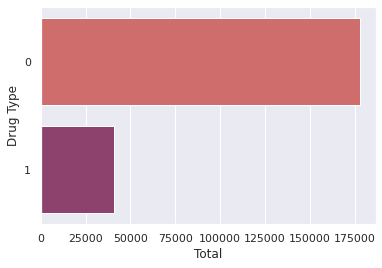

In [11]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.countplot(y="ALCOHOL", data=drug_data, palette="flare")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

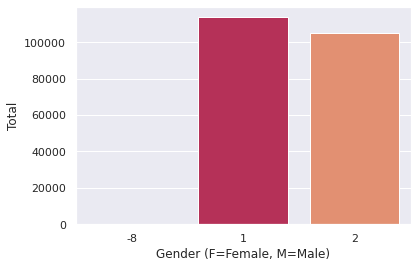

In [12]:
sns.set_theme(style="darkgrid")
sns.countplot(x="SEX", data=drug_data, palette="rocket")
plt.xlabel('Gender (F=Female, M=Male)')
plt.ylabel('Total')
plt.show()

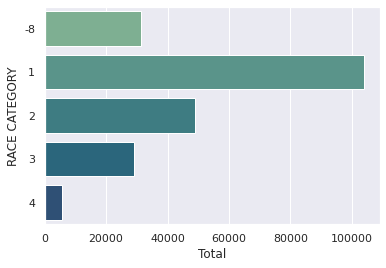

In [13]:
sns.set_theme(style="darkgrid")
sns.countplot(y="RACE", data=drug_data, palette="crest")
plt.ylabel('RACE CATEGORY')
plt.xlabel('Total')
plt.show()

<AxesSubplot:>

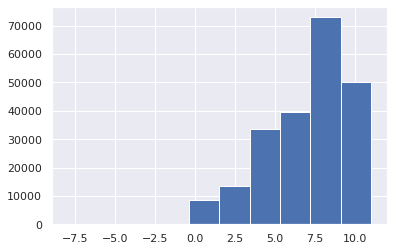

In [14]:
drug_data.AGECAT.hist()

Text(0, 0.5, 'AGECAT')

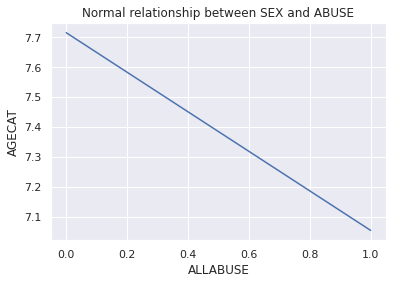

In [15]:
fig = plt.figure()
fig = drug_data.groupby(['ALLABUSE'])['AGECAT'].mean().plot()
fig.set_title('Normal relationship between SEX and ABUSE')
fig.set_ylabel('AGECAT')

In [16]:
import plotly.express as px
fig = px.pie(data_frame = drug_data, 
             values='SEX', 
             names='SEX', hole=0.3)
fig.show()

In [17]:
import plotly.express as px
fig = px.pie(data_frame = drug_data, 
             values='AGECAT', 
             names='AGECAT')
fig.show()

In [18]:
import plotly.express as px
fig = px.pie(data_frame = drug_data, 
             values='METRO', 
             names='METRO')
fig.show()

<AxesSubplot:>

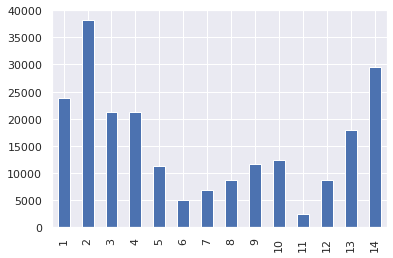

In [19]:
drug_data['METRO'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

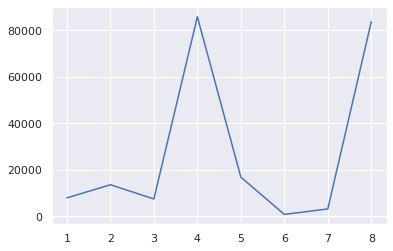

In [20]:
drug_data['CASETYPE'].value_counts().sort_index().plot.line()

In [21]:
drug_data_byage = drug_data.groupby('DAYPART').mean()[['ALCOHOL','NONALCILL','PHARMA','NONMEDPHARMA']]

<AxesSubplot:xlabel='DAYPART'>

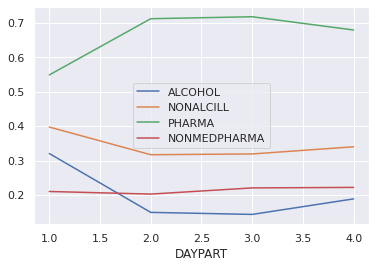

In [22]:
drug_data_byage.plot.line()

In [23]:
alcohol_sexrace = drug_data.groupby(['ALLABUSE']).mean()[['NONALCILL', 'ALCOHOL']]

<AxesSubplot:xlabel='ALLABUSE'>

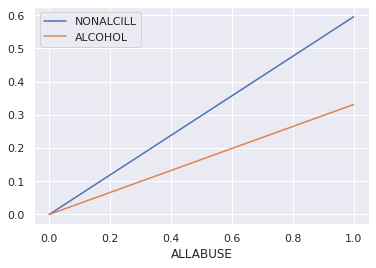

In [24]:
alcohol_sexrace.plot.line()

<AxesSubplot:>

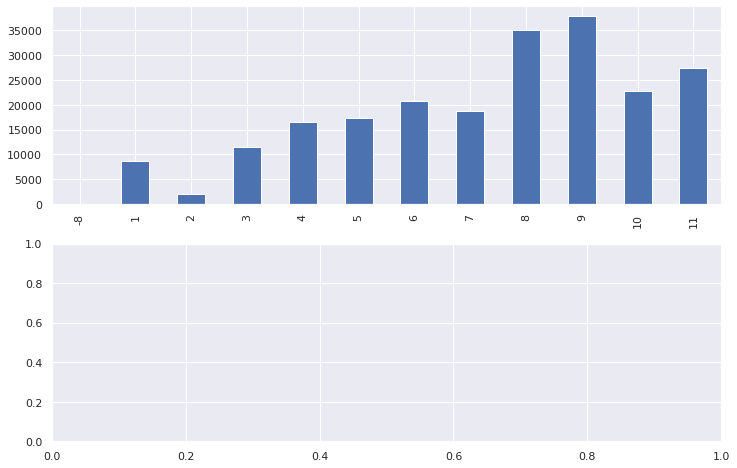

In [25]:
fig, axarr = plt.subplots(2, 1, figsize=(12, 8))

drug_data['AGECAT'].value_counts().sort_index().plot.bar(
    ax=axarr[0]
)

In [26]:
drug_data.shape

(218950, 54)

In [27]:
!pip install autoviml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
target = 'class'

In [31]:
%pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
!pip install autoviml

Imported Auto_ViML version: 0.1.710. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            

Imported Auto_NLP version: 0.1.01.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


In [54]:
target = 'ALLABUSE'

In [56]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(drug_data, test_size=0.1, random_state=99,
                                stratify=drug_data[target])
print(train.shape, test.shape)


(197055, 54) (21895, 54)


In [52]:
from autoviml.Auto_ViML import Auto_ViML

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (197055, 54)
    Training Set Memory Usage = 82.69 MB
Test Set Shape = (21895, 54)
    Test Set Memory Usage = 9.19 MB
Single_Label Target: ['ALLABUSE']

################ Binary_Classification VISUALIZATION Started #####################
Random shuffling the data set before training
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
       Class  -> Counts -> Percent
           0:   85223  ->   43.2%
           1:  111832  ->   56.8%
    Target ALLABUSE is already numeric. No transformation done.
Alert! Rare Class is not 1 but 0 in this data set
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Numb

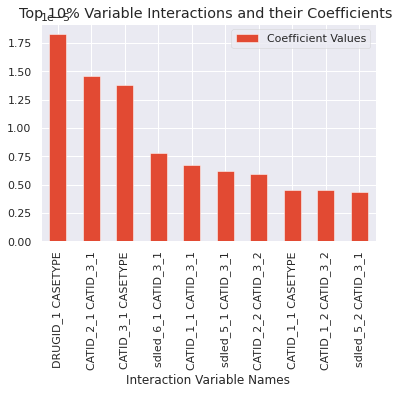

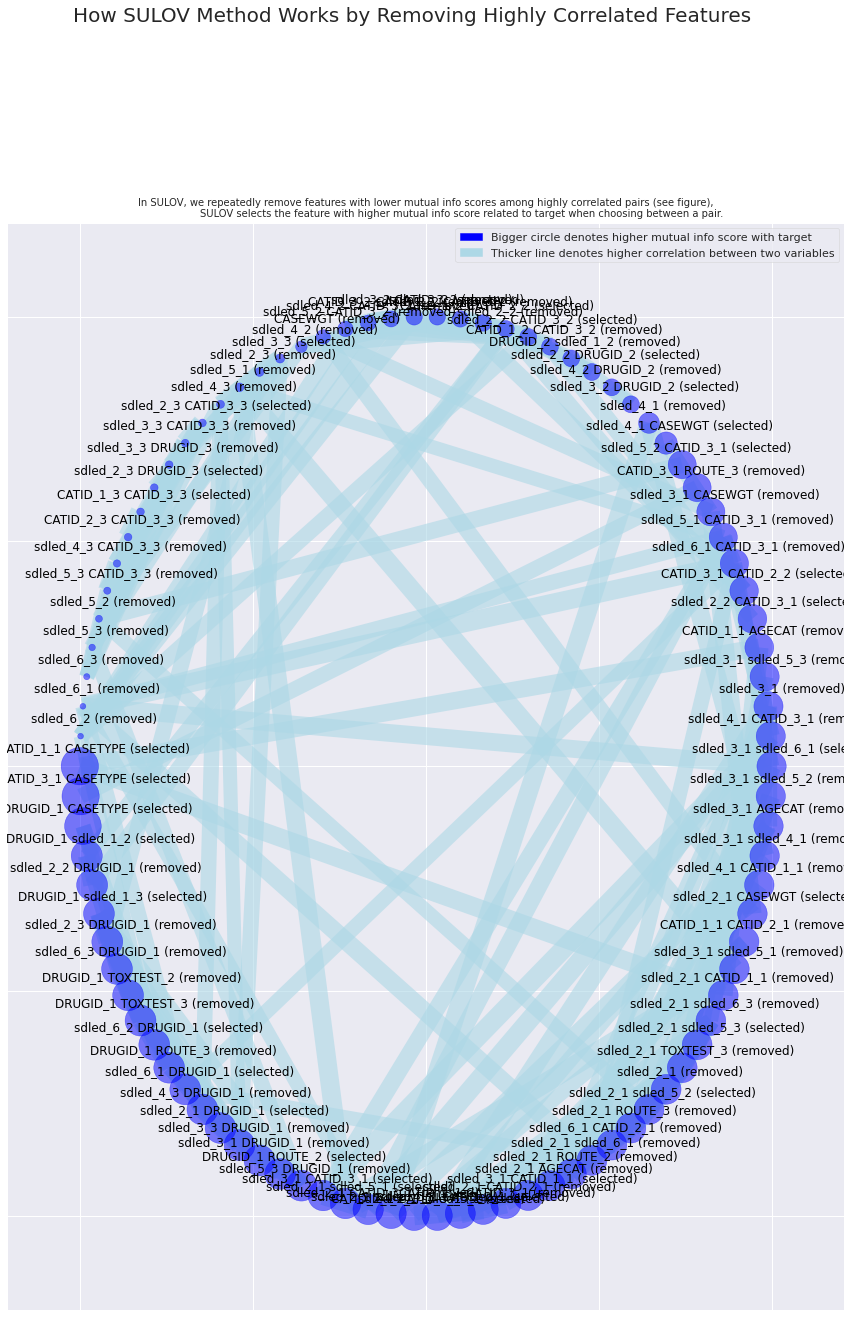

Splitting selected features into float and categorical (integer) variables:
    (54) float variables ...
    (34) categorical vars...
###############################################################################
#######     F E A T U R E   S E L E C T I O N    BY   X G B O O S T    ########
###############################################################################
Current number of predictors = 88 
    Finding Important Features using Boosted Trees algorithm...
        using 88 variables...
        using 70 variables...
        using 52 variables...
        using 34 variables...
        using 16 variables...
Found 56 important features
    Performing limited feature engineering for binning, add_poly and KMeans_Featurizer flags  ...
    Train CV Split completed with TRAIN rows =  157644 , CV rows =  39411
    Binning_Flag set to False or there are no float vars in data set to be binned
    KMeans_Featurizer set to False or there are no float variables in data
Skipping MinMax scal

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.054914


0:	learn: 0.9998858	test: 0.9998478	best: 0.9998478 (0)	total: 362ms	remaining: 30m 11s
500:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (25)	total: 1m 24s	remaining: 12m 40s
1000:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (25)	total: 2m 43s	remaining: 10m 52s
1500:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (25)	total: 4m	remaining: 9m 20s
2000:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (25)	total: 5m 20s	remaining: 7m 59s
Stopped by overfitting detector  (2000 iterations wait)

bestTest = 1
bestIteration = 25

Shrink model to first 26 iterations.
    Actual training time (in seconds): 326
###########  Single_Label  M O D E L   R E S U L T S #################
5-fold Cross Validation  weighted-f1 = 100.0%
    CatBoost Best Parameters for Model: Iterations = 25, learning_rate = 0.05
Finding Best Threshold for Highest F1 Score...


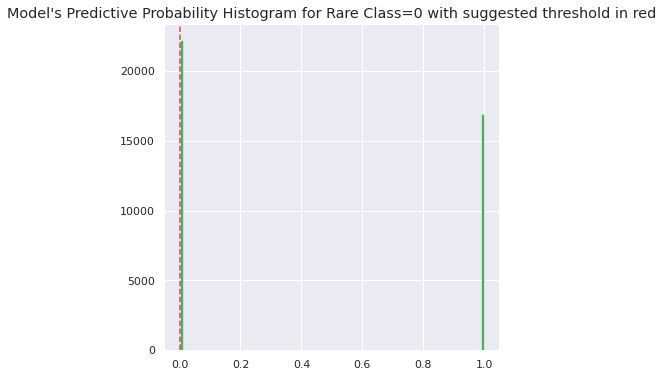

    Using threshold=0.5. However, 0.000 provides better F1=0.72 for rare class...
########################################################
CatBoost Model Prediction Results on Held Out CV Data Set:
    Regular Accuracy Score = 43.2%
Balanced Accuracy = 100.00% with Threshold = 0.50
Confusion Matrix:
[[17045     0]
 [    0 22366]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17045
           1       1.00      1.00      1.00     22366

    accuracy                           1.00     39411
   macro avg       1.00      1.00      1.00     39411
weighted avg       1.00      1.00      1.00     39411

Balanced Accuracy = 50.00% with Threshold = 0.00
Confusion Matrix:
[[17045     0]
 [22366     0]]
              precision    recall  f1-score   support

           0       0.43      1.00      0.60     17045
           1       0.00      0.00      0.00     22366

    accuracy                           0.43     39411
   macro avg       0.22  

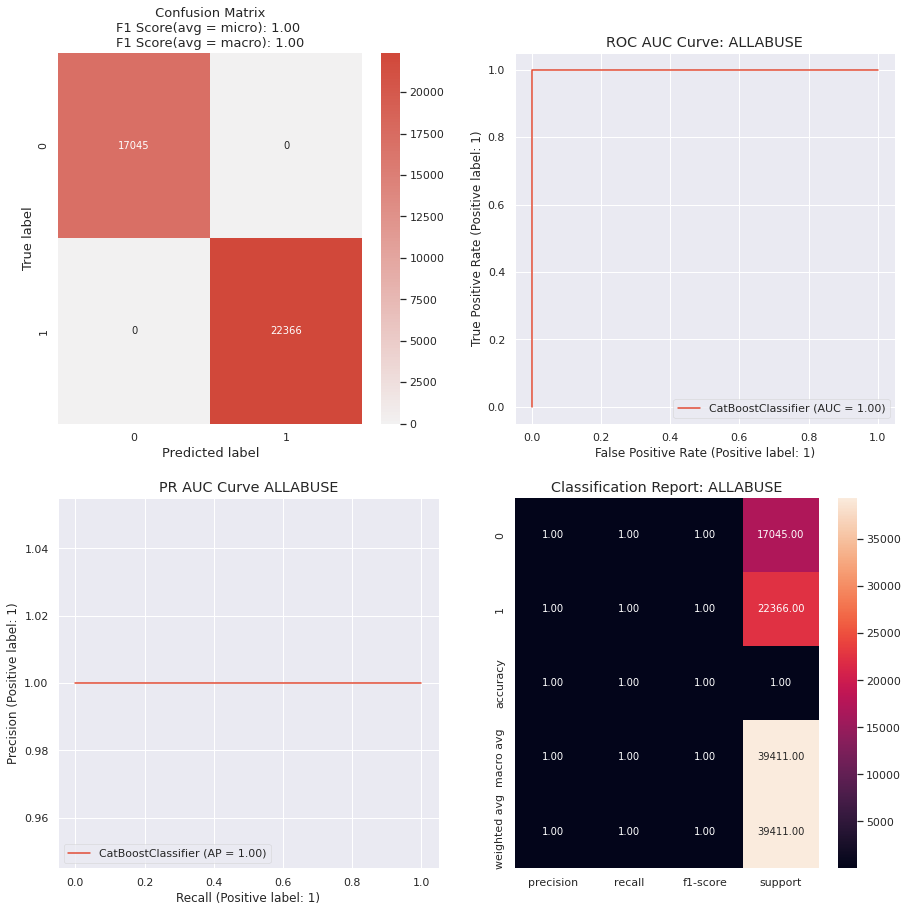

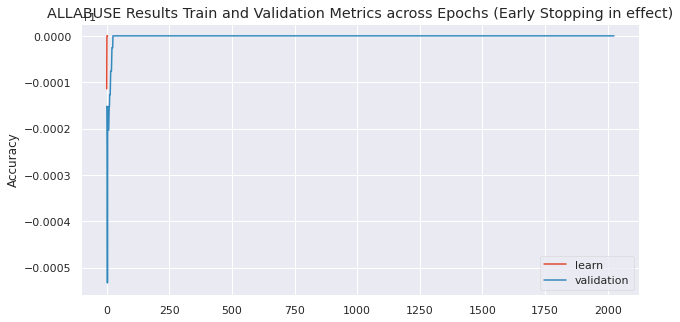

    Time taken for this Target (in seconds) = 1894
    Binning_Flag set to False or there are no float vars in data set to be binned
    Setting best params for CatBoost model from Initial State since you cannot change params to a fitted Catboost model 
    Number of Categorical and Integer variables used in CatBoost training = 30
No MinMax scaling performed since scaling flag is set to false
###########################################################################
#####   F I N A L I Z I N G   M O D E L   O N    F U L L   T R A I N  #####
###########################################################################
0:	learn: 0.9998782	total: 178ms	remaining: 4.28s
24:	learn: 0.9999899	total: 4.49s	remaining: 0us
     Actual Training time taken in seconds = 6
Training of models completed. Now starting predictions on test data...
    Making test Data predictions using regular Threshold = 0.500
    Calculating weighted average ensemble of 5 classifiers
    Plotting Feature Importances to

56

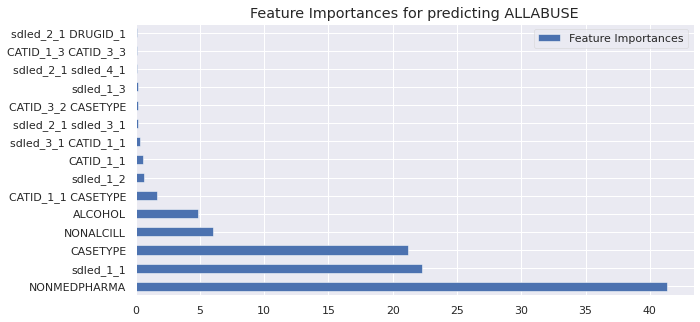

In [57]:
model, features, trainm, testm = Auto_ViML(
    train,
    target,
    test,
    sample_submission='',
    hyper_param="RS",
    feature_reduction=True,
    scoring_parameter="weighted-f1",
    KMeans_Featurizer=False,
    Boosting_Flag="CatBoost",
    Binning_Flag=False,
    Add_Poly=True,
    Stacking_Flag=False,
    Imbalanced_Flag=False,
    verbose=1,
)
len(features)

In [36]:
#import pandas as pd

#read_file = pd.read_csv (r'/content/DAWN-2011-DS0001-data-ascii.txt')
#read_file.to_csv (r'mydatafile_ascii.csv', index=None)

In [59]:
features

['CATID_2_1 CATID_3_1',
 'CASETYPE',
 'sdled_1_1',
 'sdled_2_1 sdled_5_3',
 'CATID_3_2 CASETYPE',
 'sdled_2_1 sdled_3_1',
 'NONMEDPHARMA',
 'CATID_3_2',
 'CATID_1_1 CATID_1_2',
 'AGECAT',
 'CATID_3_1 CASETYPE',
 'DRUGID_1 CASETYPE',
 'sdled_3_1 CATID_1_1',
 'DRUGID_2 CASETYPE',
 'sdled_2_2 CATID_3_1',
 'sdled_3_1 sdled_6_1',
 'sdled_2_1 sdled_4_1',
 'sdled_4_1 CATID_2_1',
 'NONALCILL',
 'sdled_2_2 CATID_3_2',
 'CASEWGT CATID_2_1',
 'CATID_1_3 CATID_3_3',
 'CATID_2_1 AGECAT',
 'CATID_1_1 CASETYPE',
 'CATID_3_1 CATID_2_2',
 'sdled_2_1 DRUGID_1',
 'sdled_2_1 sdled_5_1',
 'CATID_1_1',
 'sdled_3_3',
 'sdled_3_2',
 'sdled_2_1 sdled_5_2',
 'PHARMA',
 'CATID_3_1',
 'sdled_2_1 CASEWGT',
 'CATID_2_1',
 'sdled_5_2 CATID_3_1',
 'sdled_1_2',
 'METRO',
 'ALCOHOL',
 'CATID_3_3',
 'CATID_1_2',
 'sdled_1_3',
 'DRUGID_1',
 'CATID_2_2',
 'DRUGID_3',
 'CATID_2_3',
 'DRUGID_2',
 'DISPOSITION',
 'ROUTE_1',
 'ROUTE_3',
 'SEX',
 'NUMSUBS',
 'RACE',
 'TOXTEST_3',
 'DAYPART',
 'QUARTER']

In [37]:
#df1 = pd.read_csv('/content/mydatafile_ascii.csv', sep = '\t', header = 0)